            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
1981-01-06  15.8
1981-01-07  15.8
1981-01-08  17.4
1981-01-09  21.8
1981-01-10  20.0


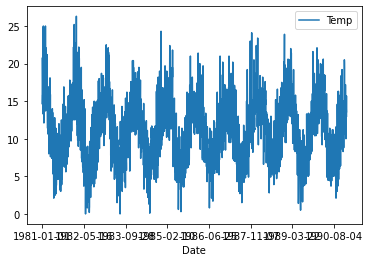

In [5]:
from pandas import read_csv
from matplotlib import pyplot

# load the dataset

series=read_csv('/home/suhail/Downloads/daily-min-temperatures.csv', header=0,index_col=0)
print(series.head(10))

series.plot()
pyplot.show()


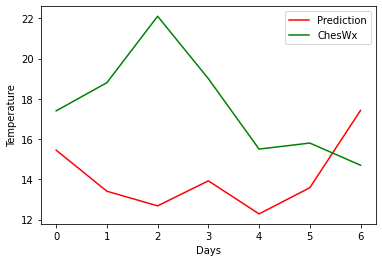

In [90]:
import numpy
from statsmodels.tsa.arima.model import ARIMA
# split the dataset

#print(len(series))
split_point=len(series)-7
dataset=series[0:split_point]
validation=series[split_point:]
#print(validation)
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)


# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)


#invert differenced value 

def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]


# load dataset
series = read_csv('dataset.csv', header=0)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()
# print summary of fit model
#print(model_fit.summary())

# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)


# invert the differenced forecast to something usable
history = [x for x in X]
suh=[]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	#print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	suh.append(inverted)
	day += 1

baal= read_csv('validation.csv')
    
#print(suh)
pyplot.plot(suh, color='r',label='Prediction')
pyplot.plot(baal, color='g',label='ChesWx')
pyplot.xlabel('Days')
pyplot.ylabel('Temperature')
pyplot.legend()
